In [1]:
from PIL import Image
import numpy as np

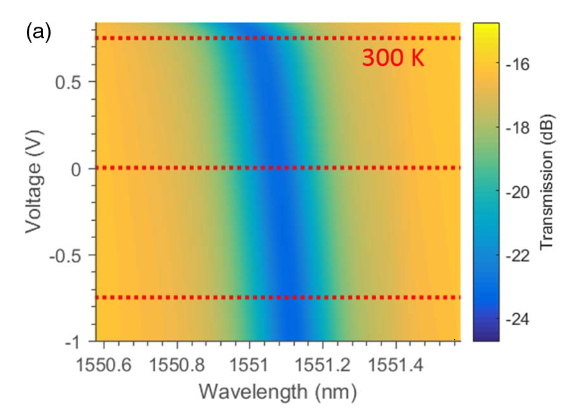

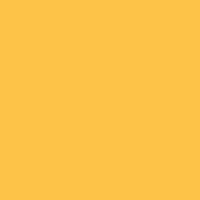

In [2]:
#Here we have the image I am analyzing as well as all the coordinates of the different elements of it.

img = Image.open("Gehl-RT.png")
img = img.convert("RGB")
p = (454,  339)

#scale is 475-497,  24-339
#graph is 97-459,  29-339                                                                                                                                                                                                                                                                                                                                                                                                                                                                    -339

d = img.getpixel(p)

img.putpixel(p, (0,0, 0))
display(img)
check = Image.new('RGB',(200,200),d)
display(check)

In [3]:
x_scale = np.linspace(475,497, 23, dtype=int)
y_scale = np.linspace(339,24, 316, dtype=int)
print(y_scale)

[339 338 337 336 335 334 333 332 331 330 329 328 327 326 325 324 323 322
 321 320 319 318 317 316 315 314 313 312 311 310 309 308 307 306 305 304
 303 302 301 300 299 298 297 296 295 294 293 292 291 290 289 288 287 286
 285 284 283 282 281 280 279 278 277 276 275 274 273 272 271 270 269 268
 267 266 265 264 263 262 261 260 259 258 257 256 255 254 253 252 251 250
 249 248 247 246 245 244 243 242 241 240 239 238 237 236 235 234 233 232
 231 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216 215 214
 213 212 211 210 209 208 207 206 205 204 203 202 201 200 199 198 197 196
 195 194 193 192 191 190 189 188 187 186 185 184 183 182 181 180 179 178
 177 176 175 174 173 172 171 170 169 168 167 166 165 164 163 162 161 160
 159 158 157 156 155 154 153 152 151 150 149 148 147 146 145 144 143 142
 141 140 139 138 137 136 135 134 133 132 131 130 129 128 127 126 125 124
 123 122 121 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106
 105 104 103 102 101 100  99  98  97  96  95  94  9

In [4]:
#next we get the rgb code for each pixel in the scale

color = []
for y in y_scale:
    line = []
    for x in x_scale:
        d = list(img.getpixel((x,y)))
        line.append(d)
    color.append(line)

In [5]:
#test print all these lines

print(color[0])
print(color[0][0])
print(color[0][0][0])
print(len(color))

[[57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [57, 40, 144], [59, 42, 146], [54, 40, 127], [58, 48, 113]]
[57, 40, 144]
57
316


In [6]:
#then we remove any duplicate rgb codes in the scale to save time

res = []
scale = []
[res.append(x) for x in color[315] if x not in res]

for line in range(0,len(color)):
    res = []
    [res.append(x) for x in color[line] if x not in res]
    scale.append(res)

(5, 168, 201)


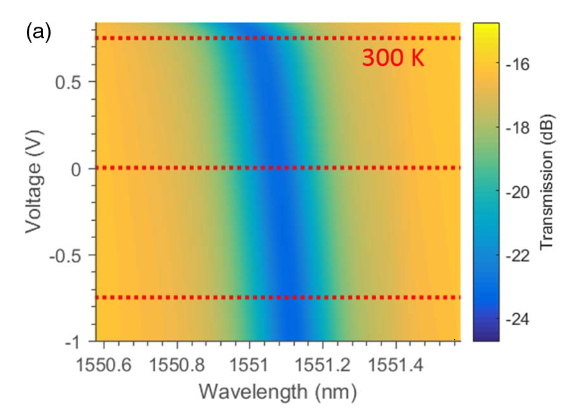

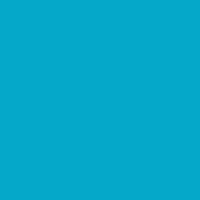

In [7]:
#Here we look at the image again

d = img.getpixel((250,190))

print(d)
display(img)

check = Image.new('RGB',(200,200),d)
display(check)

In [8]:
v = 1.8/(339-29)

print(v)

0.005806451612903226


In [9]:
#start at 0.8V
s = 0.8
voltages = []
for n in range(339-29):
    voltages.append(s)
    s = s - v

print(len(voltages))
voltages.reverse()
print(voltages[-1]) 

310
0.8


In [10]:
print(len(scale))
print(len(scale[0]))

316
4


In [11]:
x_axis = np.linspace(97,454, 360, dtype=int)
y_axis = np.linspace(339,29, 311, dtype=int)
print(x_axis)

[ 97  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 335 336 337 338 339 340 34

In [12]:
#here we look over the whole range of the graph and try and match each pixel to a color on the scale
#this one takes a bit
#this is also just for the picture, not actually recording data



test = Image.open("Gehl-RT-Copy.png")
test =  test.convert("RGB")
match = 0

for yrange in y_axis:
    for xrange in x_axis:
        pixel = list(img.getpixel((xrange,yrange)))
        for x in range(0,len(scale)):
            for l in range(0,len(scale[x])):
                compare = scale[x][l]
                #test.putpixel((xrange,yrange), (0, 0, 0))
                if pixel == compare:
                    match = match + 1
                    test.putpixel((xrange,yrange), (29, 252, 0))
                    

In [13]:
#this is how many matches we get

print(match)

30573


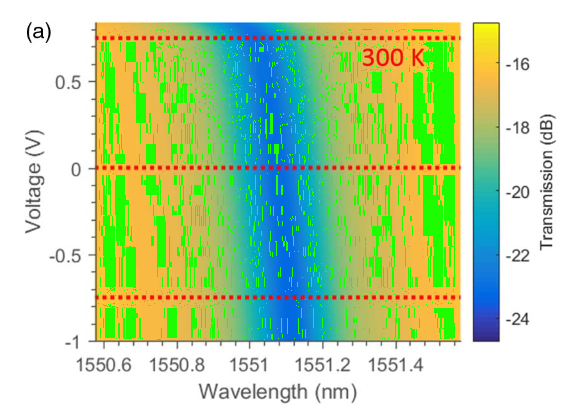

In [14]:
#this is a visual display of the data that is a match

display(test)

In [15]:
test.save("Visual-RT.png")

In [16]:
print(len(scale))
print(len(scale[x]))

316
8


In [17]:
#now we look at each pixel again and if it is a match we add it to a list in an array of all the lines
#this one also takes a while but is necessary

values = []

for yrange in y_axis:
    line = []
    for xrange in x_axis:
        pixel = list(img.getpixel((xrange,yrange)))
        for trans in range(0,len(scale)):          #trans is the y value on the scale that ths pixel matches with
            for l in range(0,len(scale[trans])):
                compare = scale[trans][l]
                if pixel == compare:
                    line.append((xrange, trans))  #xrange is the x value of the pixel on the graph that is a match
    values.append(line)
                    

In [18]:
#now we have an array of x and y values for each horizontal line. 
#the index of each line coresponds with the index of the voltage value in the voltages array

print(voltages[100])
print((values[100]))
print(len(values))

-0.41354838709677594
[(103, 269), (103, 270), (104, 272), (105, 269), (105, 270), (106, 269), (106, 270), (107, 269), (107, 270), (108, 269), (108, 270), (109, 269), (109, 270), (110, 269), (110, 270), (111, 269), (111, 270), (112, 269), (112, 270), (113, 269), (113, 270), (114, 269), (114, 270), (116, 265), (117, 265), (118, 265), (119, 265), (120, 265), (121, 265), (122, 265), (123, 265), (124, 265), (130, 265), (131, 264), (151, 260), (152, 260), (153, 260), (157, 255), (158, 255), (159, 255), (160, 255), (161, 255), (162, 255), (163, 255), (164, 255), (165, 255), (169, 253), (181, 245), (181, 246), (182, 244), (183, 244), (184, 245), (184, 246), (188, 242), (200, 232), (227, 196), (250, 136), (251, 131), (270, 67), (282, 45), (285, 45), (293, 56), (345, 202), (350, 212), (355, 218), (359, 222), (365, 226), (376, 235), (376, 236), (377, 235), (377, 236), (378, 235), (378, 236), (382, 236), (386, 241), (392, 244), (393, 244), (394, 245), (394, 246), (404, 254), (428, 265), (433, 265)

In [19]:
#now we can turn the lines into x and y arrays to graph

for l in values:
    print(l)

npvalues = np.array(values[100])
wave = npvalues[:,0]
transmission = npvalues[:,1]


[(157, 264), (158, 264), (159, 264), (160, 264), (216, 228), (221, 216), (222, 216), (229, 209), (231, 205), (233, 199), (237, 191), (253, 151), (264, 112), (272, 90), (322, 129), (341, 181), (355, 204), (397, 245), (397, 246)]
[(116, 271), (119, 268), (119, 270), (124, 265), (125, 265), (126, 265), (127, 265), (128, 265), (129, 265), (130, 265), (131, 265), (133, 265), (138, 265), (140, 264), (142, 261), (205, 237), (205, 238), (212, 227), (235, 193), (271, 92), (272, 87), (278, 66), (294, 45), (382, 230), (384, 231), (388, 234), (394, 241), (398, 244), (399, 245), (399, 246), (413, 257), (414, 257), (440, 266), (441, 267), (444, 265), (445, 265), (446, 265), (447, 265), (448, 265), (449, 265), (451, 265), (452, 265)]
[(100, 269), (100, 270), (105, 269), (105, 270), (106, 269), (106, 270), (107, 269), (107, 270), (108, 269), (108, 270), (109, 269), (109, 270), (110, 269), (110, 270), (111, 269), (111, 270), (112, 269), (112, 270), (113, 269), (113, 270), (114, 269), (114, 270), (118, 

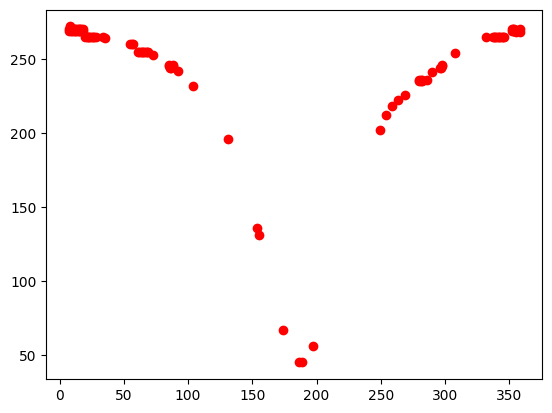

In [20]:
#we want to graph the trans mission number on the y axis and the wavelength on the x axis

import matplotlib.pyplot as plt

plt.plot(wave-96, transmission, 'ro', label='data')
plt.show()

In [21]:
#we know the general shape is right so we just need to convert the values to the right ones
total = 1551.56- 1550.56
print(total)

1.0


In [22]:
pixvalue = 1/(454-97)
print(pixvalue)


0.0028011204481792717


In [23]:
start = 1551.56
wl = []
for n in range(454-97):
    wl.append(start)
    start = start + pixvalue

In [24]:
print(wl)

[1551.56, 1551.562801120448, 1551.5656022408962, 1551.5684033613443, 1551.5712044817924, 1551.5740056022405, 1551.5768067226886, 1551.5796078431367, 1551.5824089635848, 1551.585210084033, 1551.588011204481, 1551.5908123249292, 1551.5936134453773, 1551.5964145658254, 1551.5992156862735, 1551.6020168067216, 1551.6048179271697, 1551.6076190476178, 1551.610420168066, 1551.613221288514, 1551.6160224089622, 1551.6188235294103, 1551.6216246498584, 1551.6244257703065, 1551.6272268907546, 1551.6300280112027, 1551.6328291316509, 1551.635630252099, 1551.638431372547, 1551.6412324929952, 1551.6440336134433, 1551.6468347338914, 1551.6496358543395, 1551.6524369747876, 1551.6552380952357, 1551.6580392156839, 1551.660840336132, 1551.66364145658, 1551.6664425770282, 1551.6692436974763, 1551.6720448179244, 1551.6748459383725, 1551.6776470588206, 1551.6804481792688, 1551.6832492997169, 1551.686050420165, 1551.688851540613, 1551.6916526610612, 1551.6944537815093, 1551.6972549019574, 1551.7000560224055, 15

In [25]:
total2 = 24.5-14.5
print(total2)

10.0


In [26]:
pixvalue = 10/(315)
print(pixvalue)

0.031746031746031744


In [27]:
start = -24.5
sc = []
for n in range(316):
    sc.append(start)
    start = start + pixvalue

In [28]:
print(len(sc))
print(sc)
print(sc[-1])

316
[-24.5, -24.46825396825397, -24.436507936507937, -24.404761904761905, -24.373015873015873, -24.341269841269842, -24.30952380952381, -24.27777777777778, -24.246031746031747, -24.214285714285715, -24.182539682539684, -24.150793650793652, -24.11904761904762, -24.08730158730159, -24.055555555555557, -24.023809523809526, -23.992063492063494, -23.960317460317462, -23.92857142857143, -23.8968253968254, -23.865079365079367, -23.833333333333336, -23.801587301587304, -23.769841269841272, -23.73809523809524, -23.70634920634921, -23.674603174603178, -23.642857142857146, -23.611111111111114, -23.579365079365083, -23.54761904761905, -23.51587301587302, -23.484126984126988, -23.452380952380956, -23.420634920634924, -23.388888888888893, -23.35714285714286, -23.32539682539683, -23.293650793650798, -23.261904761904766, -23.230158730158735, -23.198412698412703, -23.16666666666667, -23.13492063492064, -23.103174603174608, -23.071428571428577, -23.039682539682545, -23.007936507936513, -22.9761904761904

In [29]:
#now we just need to transform all the pixel coordinates into the correct values
new_trans_values = []
for x in range(len(transmission)):
    new_trans_values.append(sc[transmission[x]])

In [30]:
print(transmission)
print(new_trans_values)

[269 270 272 269 270 269 270 269 270 269 270 269 270 269 270 269 270 269
 270 269 270 269 270 265 265 265 265 265 265 265 265 265 265 264 260 260
 260 255 255 255 255 255 255 255 255 255 253 245 246 244 244 245 246 242
 232 196 136 131  67  45  45  56 202 212 218 222 226 235 236 235 236 235
 236 236 241 244 244 245 246 254 265 265 265 265 265 265 265 265 265 265
 265 269 270 269 270 269 270 268 268 270]
[-15.96031746031749, -15.928571428571459, -15.865079365079396, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -15.96031746031749, -15.928571428571459, -16.087301587301617, -16.087301587301617, -16.087301587301617, -16.087301587301617, -16.087301587301617, -16.08730158730

In [31]:
new_wave_values = []
for x in range(len(wave)):
    #print(wave[x]-98)
    new_wave_values.append(wl[wave[x]-98])

In [32]:
print(new_wave_values)

[1551.5740056022405, 1551.5740056022405, 1551.5768067226886, 1551.5796078431367, 1551.5796078431367, 1551.5824089635848, 1551.5824089635848, 1551.585210084033, 1551.585210084033, 1551.588011204481, 1551.588011204481, 1551.5908123249292, 1551.5908123249292, 1551.5936134453773, 1551.5936134453773, 1551.5964145658254, 1551.5964145658254, 1551.5992156862735, 1551.5992156862735, 1551.6020168067216, 1551.6020168067216, 1551.6048179271697, 1551.6048179271697, 1551.610420168066, 1551.613221288514, 1551.6160224089622, 1551.6188235294103, 1551.6216246498584, 1551.6244257703065, 1551.6272268907546, 1551.6300280112027, 1551.6328291316509, 1551.6496358543395, 1551.6524369747876, 1551.7084593837499, 1551.711260504198, 1551.714061624646, 1551.7252661064385, 1551.7280672268867, 1551.7308683473348, 1551.7336694677829, 1551.736470588231, 1551.739271708679, 1551.7420728291272, 1551.7448739495753, 1551.7476750700234, 1551.7588795518159, 1551.7924929971932, 1551.7924929971932, 1551.7952941176413, 1551.7980

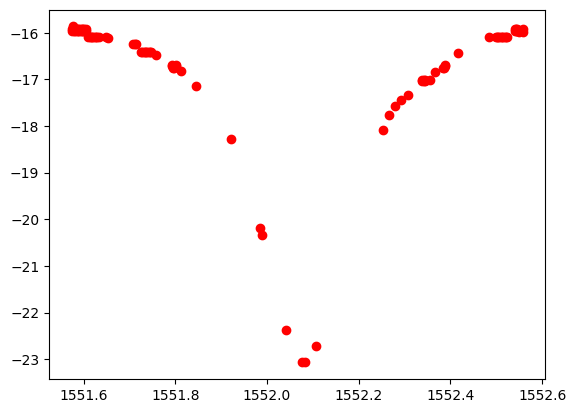

In [33]:
#test the plot now

plt.plot(new_wave_values, new_trans_values, 'ro', label='data')
plt.show()

In [34]:
#yay! now i just need to make a code that does this 315 more times
#fuck

#ok first lets make a function that turns the pixel values into the right numbers

new_values = []
def transformer(array):
    for n in range(0,len(array)):
        new_wave_values = []
        new_trans_values = []
        line = []
        npvalues = np.array(values[n]) #turning each line into an np array (easier to work with)
        wave = npvalues[:,0]           #changes all the x values in that line into one array
        transmission = npvalues[:,1]   #changes all the y values in that line into one array
        for x in range(len(wave)):
            new_wave_values.append(wl[wave[x]-99])
        line.append(new_wave_values)
        for y in range(len(transmission)):
            new_trans_values.append(sc[transmission[y]])
        line.append(new_trans_values)
        new_values.append(line)
        


In [35]:
transformer(values)

In [36]:
print(new_values)
print(len(new_values))
print(len(new_values[0]))
print(len(new_values[0][0]))

[[[1551.7224649859904, 1551.7252661064385, 1551.7280672268867, 1551.7308683473348, 1551.887731092429, 1551.9017366946696, 1551.9045378151177, 1551.9241456582545, 1551.9297478991507, 1551.935350140047, 1551.9465546218394, 1551.9913725490092, 1552.0221848739384, 1552.0445938375233, 1552.1846498599289, 1552.237871148443, 1552.2770868347166, 1552.3947338935372, 1552.3947338935372], [-16.11904761904765, -16.11904761904765, -16.11904761904765, -16.11904761904765, -17.261904761904788, -17.642857142857167, -17.642857142857167, -17.86507936507939, -17.992063492063515, -18.182539682539705, -18.436507936507958, -19.706349206349223, -20.944444444444457, -21.642857142857153, -20.40476190476192, -18.753968253968274, -18.023809523809547, -16.72222222222225, -16.690476190476218]], [[1551.6076190476178, 1551.6160224089622, 1551.6160224089622, 1551.6300280112027, 1551.6328291316509, 1551.635630252099, 1551.638431372547, 1551.6412324929952, 1551.6440336134433, 1551.6468347338914, 1551.6496358543395, 1551

In [37]:
file = open('items-RT.txt','w')
for item in new_values:
	file.write(str(item)+"\n")
file.close()

In [38]:
np.savetxt("voltages-RT.csv", voltages, delimiter = ",")

In [39]:
print(len(new_values))
print(len(new_values[0][0]))

311
19


In [40]:
#now i have all the x and y arrays in one big array
#so x would be new_values[n][0]
#and y would be new_values[n][1]
#with voltage[n] being the voltage
#next I need to graph 1 amd -1 to match them up as well as n=100 to check for differences